In [2]:
#ojo espetrograma y escalograma cwt uso la misma escalapara cada audio

# trabajo completo de analisis de audios

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler as SS
from sklearn.decomposition import PCA
import IPython.display as ipd
import scipy.fftpack as fourier
import os
from pathlib import Path

### Formación de la matriz



In [4]:
path=r"C:\Users\migue\OneDrive\Escritorio\Semestre 7\Metodos de machine learning\semana 2 a 4 audios y espectros\Audios Machine Learning"
wav_files = glob.glob(path+'\*.wav') #importando cada nombre 

wav_files.remove('C:\\Users\\migue\\OneDrive\\Escritorio\\Semestre 7\\Metodos de machine learning\\semana 2 a 4 audios y espectros\\Audios Machine Learning\\9.wav')
wav_files.remove('C:\\Users\\migue\\OneDrive\\Escritorio\\Semestre 7\\Metodos de machine learning\\semana 2 a 4 audios y espectros\\Audios Machine Learning\\14.wav')
# se removieron los audios 14 y 9
print(f'lista de audios cargados:{wav_files}')

mat=[]#lista con cada una de las filas un audio


for j in range(0,len(wav_files)):
    print(wav_files[j],'\n')
    srate,data=waves.read(wav_files[j]) # importamos el audio y formamos un vector de este, usando el canal 1 del audio en estéreo se recortara.
    length = data.shape[0] / srate
    time = np.linspace(0., length, data.shape[0])
    #print(f'dimension de audio original {data.shape[0]}')

    data1=data[:,1][43000:172000] # recortamos el vector de audio obtenido debido a que al inicio y al final de este el sonido es ruido o silencio.
    length1 =len(data1)/ srate    # el audio se recorta 1/4 tanto al inicio como al final 
    time1 = np.linspace((43000)/srate, length1, data1.shape[0])
    #print(f'dimension de audio cortado {data1.shape[0]}')

    #print('Pre-proceso realizado')

    mat.append(data1)

    '''# cuadro comentado de las graficas de cada uno de los audios para poder comparar el original y el recortado
    plt.plot(time, data[:, 1], label="orginal")
    plt.plot(time1+0.578, data1,  label="cortado")

    plt.legend()
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()
    '''


print('-----------------------------------------------------------')
matrix=np.stack( mat, axis=0 ) #formación de la matriz cuyas filas son los archivos de audio, como array

#for k in range(0,len(mat)): #verificar dimensiones de los vectores
    #print(len(mat[k]))
print(matrix)
print(f'\nDimensiones de la matriz{matrix.shape}')

lista de audios cargados:['C:\\Users\\migue\\OneDrive\\Escritorio\\Semestre 7\\Metodos de machine learning\\semana 2 a 4 audios y espectros\\Audios Machine Learning\\1.wav', 'C:\\Users\\migue\\OneDrive\\Escritorio\\Semestre 7\\Metodos de machine learning\\semana 2 a 4 audios y espectros\\Audios Machine Learning\\10.wav', 'C:\\Users\\migue\\OneDrive\\Escritorio\\Semestre 7\\Metodos de machine learning\\semana 2 a 4 audios y espectros\\Audios Machine Learning\\11.wav', 'C:\\Users\\migue\\OneDrive\\Escritorio\\Semestre 7\\Metodos de machine learning\\semana 2 a 4 audios y espectros\\Audios Machine Learning\\12.wav', 'C:\\Users\\migue\\OneDrive\\Escritorio\\Semestre 7\\Metodos de machine learning\\semana 2 a 4 audios y espectros\\Audios Machine Learning\\13.wav', 'C:\\Users\\migue\\OneDrive\\Escritorio\\Semestre 7\\Metodos de machine learning\\semana 2 a 4 audios y espectros\\Audios Machine Learning\\15.wav', 'C:\\Users\\migue\\OneDrive\\Escritorio\\Semestre 7\\Metodos de machine learning\

### Analisis de valores singulares

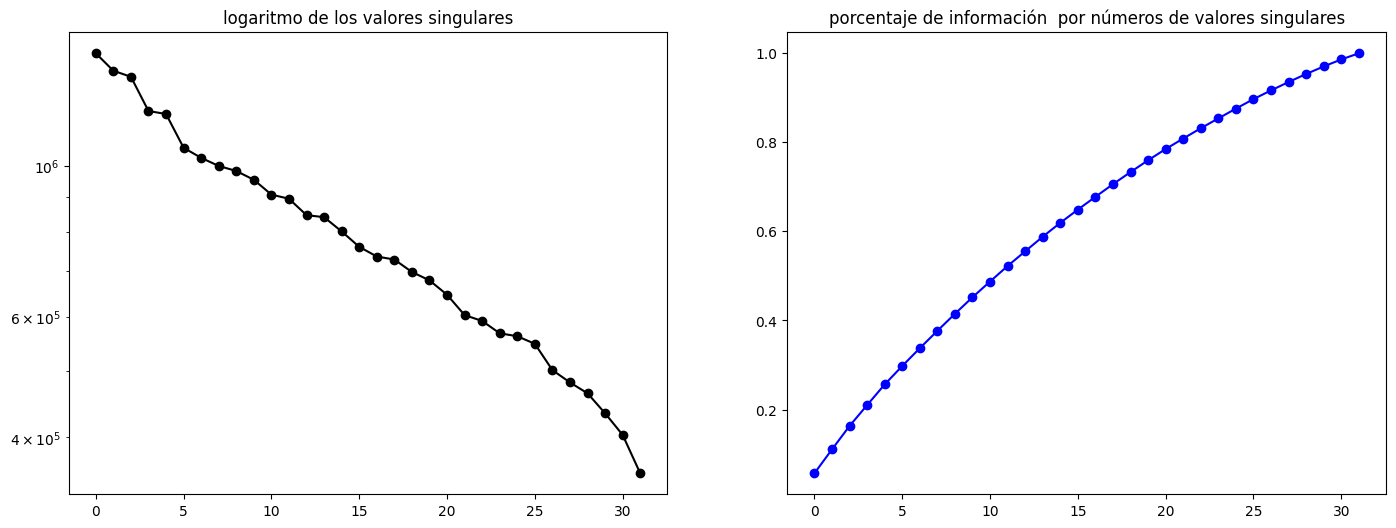

In [5]:
U,S,VT=np.linalg.svd(matrix, full_matrices=False)
fig = plt.figure(figsize=(17,6))
ax1=fig.add_subplot(121)
ax1.set_title('logaritmo de los valores singulares')
ax1.semilogy(S,'-o',color='k')
ax2 = fig.add_subplot(122)
ax2.set_title('porcentaje de información  por números de valores singulares')
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='b')

### Normalizacion usando z-score
$$x_z = \frac{x-\mu}{\sigma}$$
se realizó la normalización para cada fila de la matriz

In [6]:
'''
# Calculate the mean and standard deviation for each row
row_means = np.mean(matrix, axis=1)
row_stdevs = np.std(matrix, axis=1)

# Subtract the mean from each element in the row
matrix_centered = matrix - row_means.reshape(-1, 1)

# Divide each element in the row by the standard deviation
matrix_zscored = matrix_centered / row_stdevs.reshape(-1, 1)

print(matrix_zscored)
'''

'\n# Calculate the mean and standard deviation for each row\nrow_means = np.mean(matrix, axis=1)\nrow_stdevs = np.std(matrix, axis=1)\n\n# Subtract the mean from each element in the row\nmatrix_centered = matrix - row_means.reshape(-1, 1)\n\n# Divide each element in the row by the standard deviation\nmatrix_zscored = matrix_centered / row_stdevs.reshape(-1, 1)\n\nprint(matrix_zscored)\n'

In [7]:
scaler = SS()
Nmatrix = scaler.fit_transform(matrix)

### Etiquetas de cada audio

In [8]:
#por sexo
sx=["M","H","H","M","H","H","H","Ha","M","H",
    "M","H","M","H","H","H","H","H","H","H",
    "M","H","H","H","H","H","M",
    "H","H","H","H","H"]


### Descomposicion en componentes principales

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[-4.21871667e-04 -5.13453982e-04 -6.35644838e-04 ...  2.45272435e-04
   1.85994146e-04  7.55115462e-05]
 [-3.46586869e-03 -3.53903777e-03 -3.66180893e-03 ... -4.43692305e-03
  -4.61754038e-03 -4.96880762e-03]
 [ 1.65300803e-03  1.80368439e-03  1.89615131e-03 ... -2.36016223e-03
  -2.38127255e-03 -2.67092388e-03]
 ...
 [ 2.62520535e-03  2.64285103e-03  2.79014301e-03 ... -2.36498567e-03
  -2.15886613e-03 -2.22059836e-03]
 [ 5.56692145e-04  3.58050495e-04  5.71359078e-05 ... -4.24497701e-04
  -2.89090005e-04 -5.65543215e-04]
 [ 6.52957110e-05  1.81706512e-04  5.22730092e-04 ... -1.28291790e-03
  -1.17498232e-03 -1.01560819e-03]]
(8, 129000)


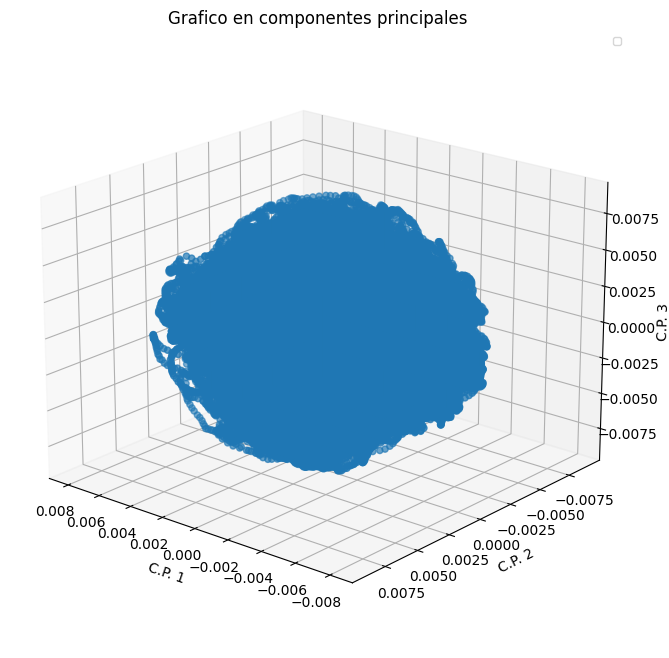

In [13]:
pca=PCA(8)
pca.fit(Nmatrix)
print(pca.components_)
print(pca.components_.shape)


# VERSION PRIMITIVA DE PCA
fig0=plt.figure(figsize=(33, 8))
ax=fig0.add_subplot(111,projection='3d',title='Grafico en componentes principales')

x=pca.components_[0]
y=pca.components_[1]
z=pca.components_[2]


ax.scatter(x,y,z,marker='o')

ax.legend(loc='upper right',ncols=2,fontsize=7,markerscale=0.7)
ax.set_xlabel('C.P. 1')
ax.set_ylabel('C.P. 2')
ax.set_zlabel('C.P. 3')


#for angle in range(0,360):
ax.view_init(20,130 )
#plt.draw()
#plt.pause(.01)
plt.show()

usar funcion de normalizacionç

crear etiquetas